In [35]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

In [36]:
# Import the Dataset
data = pd.read_csv('games.csv', header=0, delimiter=',',usecols = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id','winner'])
# split our dataset into its attributes(x) and labels(y)
X = data.iloc[:, 1:].values 
y = data.iloc[:, 0].values

# divide our dataset into training and test splits
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)  


In [37]:
# Feature Scaling (normalization)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
# make predictions
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)  

# Evaluat the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[1331 1221]
 [1323 1274]]
              precision    recall  f1-score   support

           1       0.50      0.52      0.51      2552
           2       0.51      0.49      0.50      2597

   micro avg       0.51      0.51      0.51      5149
   macro avg       0.51      0.51      0.51      5149
weighted avg       0.51      0.51      0.51      5149



Text(0, 0.5, 'Mean Error')

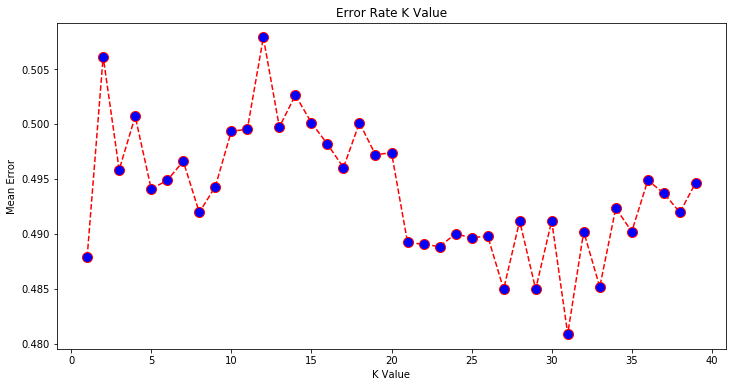

In [39]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')      